In [13]:
from collections import Counter

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB
None


<AxesSubplot:ylabel='user_followers'>

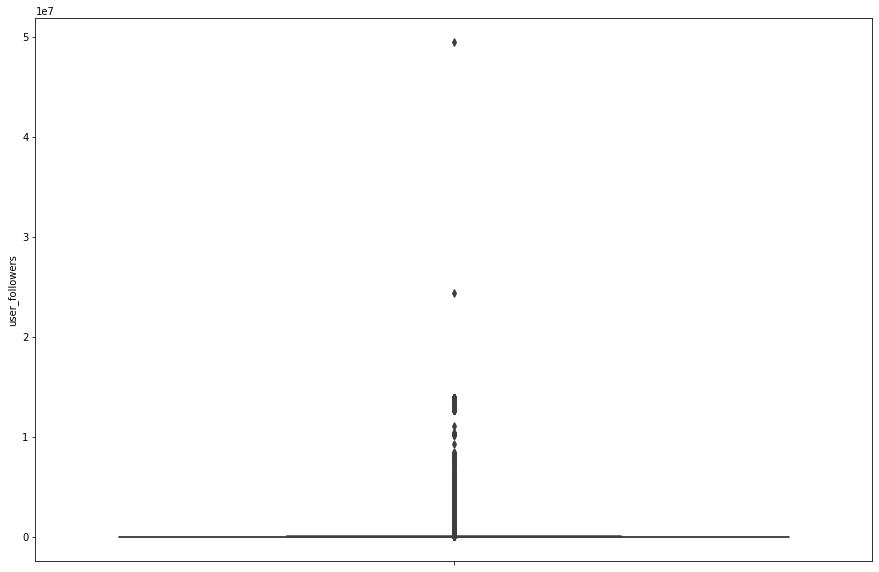

In [125]:
# data = pd.read_csv('RUvideos.csv')
# data = pd.read_csv('musicnet.csv')
data = pd.read_csv('covid19_tweets.csv')
print(data.info())
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['user_followers'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44803 entries, 2 to 80735
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         44803 non-null  object 
 1   user_location     44803 non-null  object 
 2   user_description  44803 non-null  object 
 3   user_created      44803 non-null  object 
 4   user_followers    44803 non-null  float64
 5   user_friends      44803 non-null  int64  
 6   user_favourites   44803 non-null  int64  
 7   user_verified     44803 non-null  bool   
 8   date              44803 non-null  object 
 9   text              44803 non-null  object 
 10  hashtags          44803 non-null  object 
 11  source            44803 non-null  object 
 12  is_retweet        44803 non-null  bool   
dtypes: bool(2), float64(1), int64(2), object(8)
memory usage: 4.2+ MB
None


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,1180.0,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,608.0,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,25.0,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,0.0,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,546.0,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80728,Soundar C / சௌந்தர் செ,Coimbatore/Sivakasi,யாதும் ஊரே யாவரும் கேளிர்\n💻Software Engineer🖥,2010-08-30 01:23:05,2146.0,2618,13476,False,2020-08-06 15:02:45,#CoronavirusInIndia : Coronavirus cases in Ind...,['CoronavirusInIndia'],Twitter Web App,False
80729,"Kelly-Anne Bryan, RN","Pennsylvania, USA","Hospital, home care RN 30+ yrs. Extensive lite...",2017-02-11 18:35:54,709.0,356,6687,False,2020-08-06 15:02:45,Great tool from Georgia Tech to estimate risk ...,['COVID19'],Twitter for Android,False
80730,SRTK,"California, USA",Stander Reubens Thomas Kinsey is California's ...,2016-07-22 22:22:43,61.0,650,494,False,2020-08-06 15:02:45,“Music melts all the separate parts of our bod...,"['music', 'love', 'inspiration', 'thoughtofthe...",Hootsuite Inc.,False
80732,City of London,"Guildhall, London","Follow us for news, events, announcements and ...",2008-09-08 10:51:43,335.0,829,531,True,2020-08-06 15:02:44,⁉️🧪😷 Do you know how to get tested for #COVID1...,['COVID19'],Twitter Web App,False


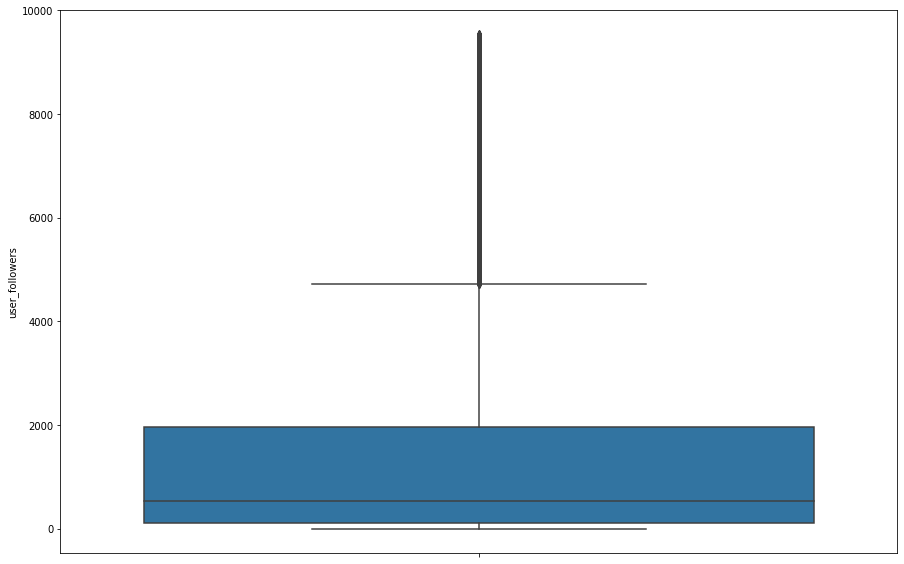

In [127]:
updated, _, _ = scp.stats.sigmaclip(data['user_followers'])
data['user_followers'] = pd.DataFrame(updated)
data = data.dropna()
print(data.info())
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['user_followers'])
data

In [109]:
print(data['user_location'].value_counts()[:20])

sample_india = data[data['user_location'] == 'India'].sample(500, random_state=13)

sample_us = data[(data['user_location'] == 'United States') | (data['user_location'] == 'US')].sample(500, random_state=13)
sample_us['user_location'] = sample_us['user_location'].replace('US', 'United States')

sample_uk = data[(data['user_location'] == 'United Kingdom') | (data['user_location'] == 'UK')].sample(500, random_state=13)
sample_uk.loc[sample_uk['user_location'] == 'UK', 'user_location'] = 'United Kingdom'

sample_australia = data[data['user_location'] == 'Australia'].sample(500, random_state=13)

# sample_sa = data[data['user_location'] == 'South Africa'].sample(500, random_state=13)

# print('\n' + str(len(sample_india)), len(sample_us), len(sample_uk), len(sample_australia), len(sample_sa))
print('\n' + str(len(sample_india)), len(sample_us), len(sample_uk), len(sample_australia))

India               2372
United States       1382
New Delhi, India    1098
Mumbai, India        875
Washington, DC       765
London, England      710
London               644
United Kingdom       613
New York, NY         604
New Delhi            510
Australia            500
Switzerland          487
Worldwide            463
South Africa         462
UK                   447
USA                  447
Canada               443
Global               442
Los Angeles, CA      426
California, USA      358
Name: user_location, dtype: int64

500 500 500 500


In [114]:
# df = [sample_india, sample_us, sample_uk, sample_australia, sample_sa]
df = [sample_india, sample_us, sample_uk, sample_australia]
temp_data = pd.concat(df)
print(temp_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6582 to 112582
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         2000 non-null   object 
 1   user_location     2000 non-null   object 
 2   user_description  2000 non-null   object 
 3   user_created      2000 non-null   object 
 4   user_followers    2000 non-null   float64
 5   user_friends      2000 non-null   int64  
 6   user_favourites   2000 non-null   int64  
 7   user_verified     2000 non-null   bool   
 8   date              2000 non-null   object 
 9   text              2000 non-null   object 
 10  hashtags          2000 non-null   object 
 11  source            2000 non-null   object 
 12  is_retweet        2000 non-null   bool   
dtypes: bool(2), float64(1), int64(2), object(8)
memory usage: 191.4+ KB
None


6582      1767.0
131494    1575.0
23966      537.0
35349      711.0
14220     2051.0
           ...  
72683      739.0
9604      8906.0
23032     4374.0
45448       24.0
112582      27.0
Name: user_followers, Length: 2000, dtype: float64
ShapiroResult(statistic=0.7231194376945496, pvalue=0.0)
Распределение не является нормальным



<AxesSubplot:xlabel='user_followers', ylabel='Count'>

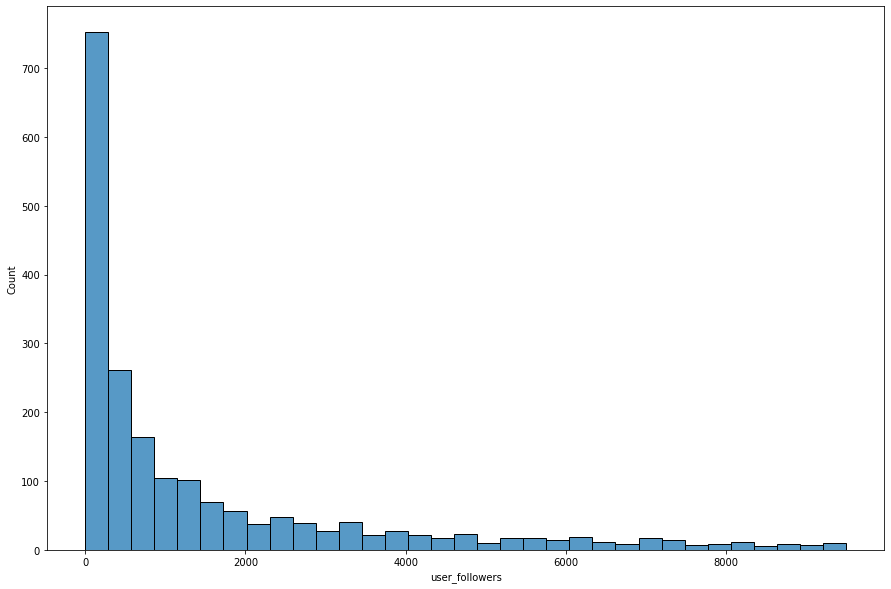

In [129]:
alpha = 0.05
print(temp_data['user_followers'])
shapiro_test = stats.shapiro(temp_data['user_followers'])
print(shapiro_test)

if shapiro_test.pvalue > alpha:
    print('Нормальное распределение\n')
else:
    print('Распределение не является нормальным\n')

plt.figure(figsize=(15, 10))
sns.histplot(temp_data['user_followers'])


KruskalResult(statistic=2.303707344735117, pvalue=0.5118110502277036)
Принять гипотезу о зависимости



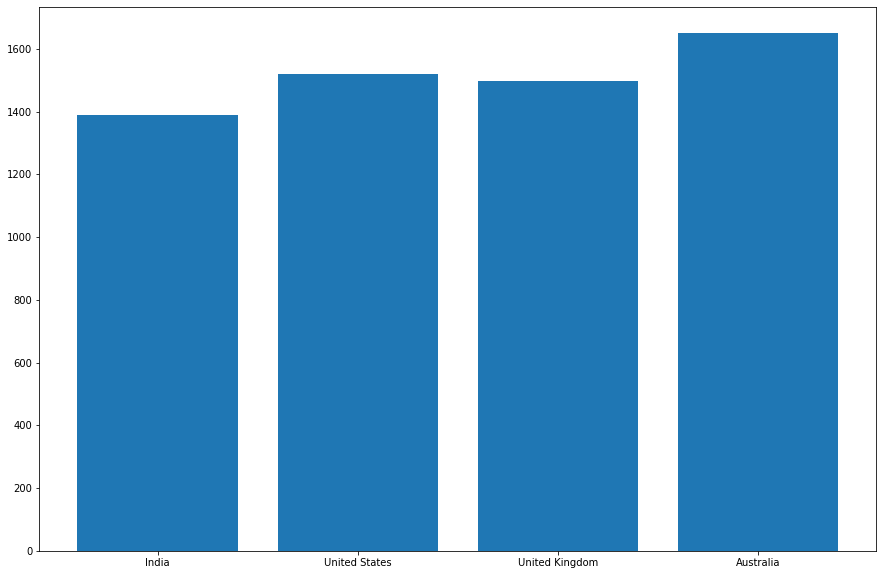

Мат ожидания:
India - 1389.35
United States - 1518.62
United Kingdom - 1496.11
Australia - 1650.25


In [117]:
alpha = 0.05

# country_name = ['India', 'United States', 'United Kingdom', 'Australia', 'South Africa']
country_name = ['India', 'United States', 'United Kingdom', 'Australia']

countries = {}
for cntry in country_name:
    countries[cntry] = temp_data['user_followers'][temp_data['user_location']==cntry].values

values = countries.values()
kruskal_test = stats.kruskal(*values)
print(kruskal_test)

if kruskal_test.pvalue > alpha:
    print('Принять гипотезу о зависимости\n')
else:
    print('Отклонить гипотезу о зависимости\n')

counts = Counter(temp_data['user_followers'])
plt.figure(figsize=(15, 10))
test_means = [x.mean() for x in values]
plt.bar(country_name, test_means)
plt.show()

print('Мат ожидания:\n' + '\n'.join([str(x) + ' - ' + str(countries[x].mean()) for x in countries]))

In [118]:
print('Отклонения:\n' + '\n'.join([str(x) + ' - ' + str(countries[x].std()) for x in countries]))

Отклонения:
India - 1956.5533428710805
United States - 2100.4634754263166
United Kingdom - 2064.0098347391663
Australia - 2269.592761598433


In [131]:
f_oneway_test = stats.f_oneway(*[x['user_followers'] for x in df])
print(f_oneway_test)
if f_oneway_test.pvalue > alpha:
    print('Принять гипотезу о зависимости\n')
else:
    print('Отклонить гипотезу о зависимости\n')

F_onewayResult(statistic=1.298247144372855, pvalue=0.27337371505237795)
Принять гипотезу о зависимости



In [132]:
mw_test = stats.mannwhitneyu(sample_india['user_followers'], sample_us['user_followers'])
print('India : US\n' + str(mw_test), '\n')

mw_test = stats.mannwhitneyu(sample_us['user_followers'], sample_uk['user_followers'])
print('US : UK\n' + str(mw_test), '\n')

mw_test = stats.mannwhitneyu(sample_uk['user_followers'], sample_australia['user_followers'])
print('UK : Australia\n' + str(mw_test), '\n')

mw_test = stats.mannwhitneyu(sample_australia['user_followers'], sample_india['user_followers'])
print('Australia : India\n' + str(mw_test), '\n')

India : US
MannwhitneyuResult(statistic=121015.5, pvalue=0.19149009567300296) 

US : UK
MannwhitneyuResult(statistic=123321.5, pvalue=0.3566421749392838) 

UK : Australia
MannwhitneyuResult(statistic=124485.0, pvalue=0.455147975495909) 

Australia : India
MannwhitneyuResult(statistic=118921.0, pvalue=0.09158262064605821) 



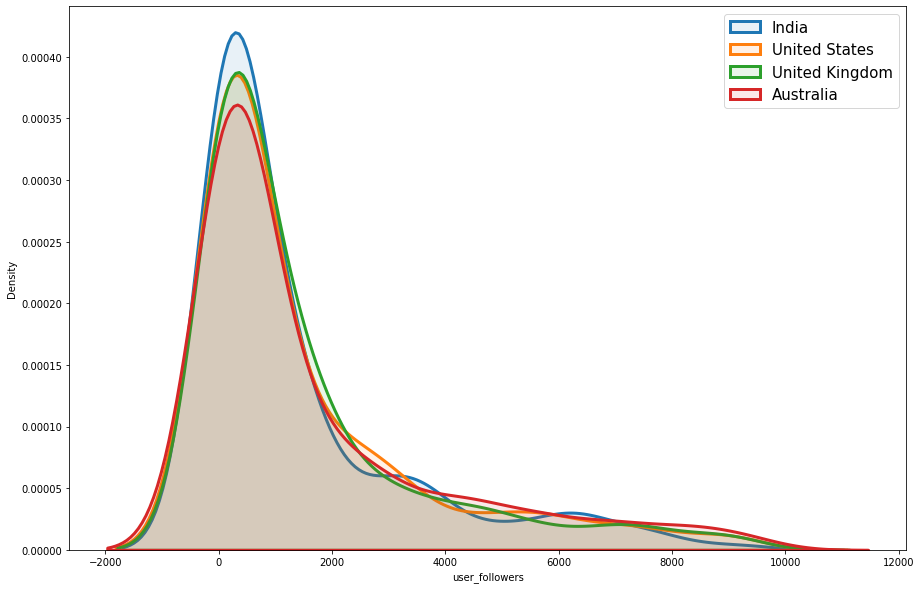

In [165]:
# sns.set_style("white")
plt.figure(figsize=(15, 10))

for cntry in country_name:
    sns.kdeplot(temp_data[temp_data['user_location'] == cntry]['user_followers'], lw=3, fill=True, alpha=.1)
    # sns.distplot(temp_data[temp_data['user_location'] == cntry]['user_followers'], kde_kws=dict(lw=3))

plt.legend(country_name, fontsize=15)

plt.show()

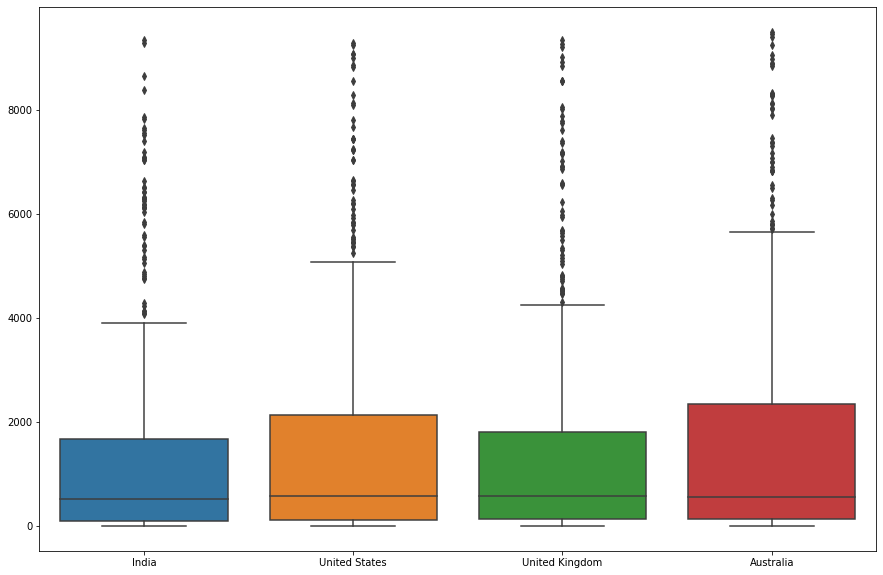

In [172]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=pd.DataFrame(countries))
plt.show()